# Impact of Lifestyle Factors on Sleep 

In this project, we will analyze how various lifestyle factors such as physical activity, stress levels, and BMI categories impact sleep. This project will provide insights into how different lifestyle choices affect sleep health and overall well-being.



**Insomnia**: Difficulty falling asleep or staying asleep despite the opportunity to sleep. It can be short-term or long-term and may be caused by various factors like stress or poor sleep habits.

**Sleep Apnea**: Pauses in breathing during sleep, leading to shallow breaths or complete stops in airflow. There are two main types: obstructive (due to throat muscle relaxation) and central (due to brain signal issues). It can cause symptoms like loud snoring and daytime fatigue and may lead to serious health issues if untreated. Treatment options include lifestyle changes, CPAP therapy, oral appliances, or surgery.

* 152120221125 - Ceren Adıyaman
* 152120221111 - Gamze Dağ

## Libraries & Importing The Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') #to avoid the warning messages

In [2]:
sleep_health_and_lifestyle=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df=sleep_health_and_lifestyle.copy()

## Dataset Analysis

> **First 5 element**

In [3]:
df.head()

Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75        10000            NaN  
2         125/80          75        10000            NaN  
3         140/90          85         3000    Sleep Apnea  
4         140/90          85         3000    Sleep Apnea

> **Last 5 element**

In [4]:
df.tail()

Person ID  Gender  Age Occupation  Sleep Duration  Quality of Sleep  \
369        370  Female   59      Nurse             8.1                 9   
370        371  Female   59      Nurse             8.0                 9   
371        372  Female   59      Nurse             8.1                 9   
372        373  Female   59      Nurse             8.1                 9   
373        374  Female   59      Nurse             8.1                 9   

     Physical Activity Level  Stress Level BMI Category Blood Pressure  \
369                       75             3   Overweight         140/95   
370                       75             3   Overweight         140/95   
371                       75             3   Overweight         140/95   
372                       75             3   Overweight         140/95   
373                       75             3   Overweight         140/95   

     Heart Rate  Daily Steps Sleep Disorder  
369          68         7000    Sleep Apnea  
370          68         7000    Sleep Apnea  
371          68         7000    Sleep Apnea  
372          68         7000    Sleep Apnea  
373          68         7000    Sleep Apnea

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
df.shape

(374, 13)

In [7]:
df.describe()

Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  45.000000      4.000000   68.000000   5600.000000  
50%                  60.000000      5.000000   70.000000   7000.000000  
75%                  75.000000      7.000000   72.000000   8000.000000  
max                  90.000000      8.000000   86.000000  10000.000000

The `describe()` method provides a summary of statistics for numerical columns in the DataFrame.

- **Person ID**: The IDs are uniformly distributed between 1 and 374.
- **Age**: The average age is approximately 42 years, with a range from 27 to 59 years.
- **Sleep Duration**: The average sleep duration is about 7.13 hours, with most values between 5.8 and 8.5 hours.
- **Quality of Sleep**: The average quality of sleep score is 7.31, with a range from 4 to 9.
- **Physical Activity Level**: The average physical activity level is 59.17, ranging from 30 to 90.
- **Stress Level**: The average stress level is 5.39, with most values between 3 and 8.
- **Heart Rate**: The average heart rate is 70.17 beats per minute, with a narrow range from 65 to 86.
- **Daily Steps**: The average number of daily steps is 6816.84, with most values between 3000 and 10000 steps.



In [8]:
df.describe(include ='all').T

count unique          top freq        mean  \
Person ID                374.0    NaN          NaN  NaN       187.5   
Gender                     374      2         Male  189         NaN   
Age                      374.0    NaN          NaN  NaN   42.184492   
Occupation                 374     11        Nurse   73         NaN   
Sleep Duration           374.0    NaN          NaN  NaN    7.132086   
Quality of Sleep         374.0    NaN          NaN  NaN    7.312834   
Physical Activity Level  374.0    NaN          NaN  NaN   59.171123   
Stress Level             374.0    NaN          NaN  NaN    5.385027   
BMI Category               374      4       Normal  195         NaN   
Blood Pressure             374     25       130/85   99         NaN   
Heart Rate               374.0    NaN          NaN  NaN   70.165775   
Daily Steps              374.0    NaN          NaN  NaN  6816.84492   
Sleep Disorder             155      2  Sleep Apnea   78         NaN   

                                 std     min     25%     50%     75%      max  
Person ID                 108.108742     1.0   94.25   187.5  280.75    374.0  
Gender                           NaN     NaN     NaN     NaN     NaN      NaN  
Age                         8.673133    27.0   35.25    43.0    50.0     59.0  
Occupation                       NaN     NaN     NaN     NaN     NaN      NaN  
Sleep Duration              0.795657     5.8     6.4     7.2     7.8      8.5  
Quality of Sleep            1.196956     4.0     6.0     7.0     8.0      9.0  
Physical Activity Level    20.830804    30.0    45.0    60.0    75.0     90.0  
Stress Level                1.774526     3.0     4.0     5.0     7.0      8.0  
BMI Category                     NaN     NaN     NaN     NaN     NaN      NaN  
Blood Pressure                   NaN     NaN     NaN     NaN     NaN      NaN  
Heart Rate                  4.135676    65.0    68.0    70.0    72.0     86.0  
Daily Steps              1617.915679  3000.0  5600.0  7000.0  8000.0  10000.0  
Sleep Disorder                   NaN     NaN     NaN     NaN     NaN      NaN

The `describe(include='all')` method provides a summary of statistics for both numerical and categorical columns in the DataFrame.

>  **Check for missing values**

In [9]:
df.isnull().any()

Person ID                  False
Gender                     False
Age                        False
Occupation                 False
Sleep Duration             False
Quality of Sleep           False
Physical Activity Level    False
Stress Level               False
BMI Category               False
Blood Pressure             False
Heart Rate                 False
Daily Steps                False
Sleep Disorder              True
dtype: bool

In [10]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

All columns except "Sleep Disorder" have complete data with no missing values. The "Sleep Disorder" column has 219 missing entries.

> **Handle missing values**

In [11]:
df['Sleep Disorder'].fillna('None', inplace=True)

In [12]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

> **Check for duplicate**

In [13]:
df.duplicated().sum()

0

We don't have any duplicated data, but if we did we were going to use:
df.drop_duplicates()

> **Unique Values**

In [14]:
for i, column in enumerate(df.columns):
    unique_values = df[column].unique()
    print(f"'{column}': {unique_values}\n")
    print('__________________________________\n')


'Person ID': [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 2

In [15]:
df['BMI Category'] = df['BMI Category'].replace({'Normal Weight': 'Underweight'})
df['BMI Category'].value_counts()

BMI Category
Normal         195
Overweight     148
Underweight     21
Obese           10
Name: count, dtype: int64

We had both "Normal" and "Normal Weight" under the BMI Category, we assumed that "Normal Weight" was miswritten and actually represents "Underweight". While these categories might represent the same thing, we didn't want to corrupt our data, so we considered the probability of this mistake lower. Thus, we decided to change the name of "Normal Weight" to "Underweight".

In [16]:
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

> **Converting object type to categoical type**

Converting object types to categorical types is beneficial for memory efficiency, performance optimization, and data consistency

In [17]:
cat_df = df.select_dtypes(include=[object]).columns

In [18]:
df[cat_df] = df[cat_df].astype("category")
df

Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                   6                       60             8       Normal   
2                   6                       60             8       Normal   
3                   4                       30             8        Obese   
4                   4                       30             8        Obese   
..                ...                      ...           ...          ...   
369                 9                       75             3   Overweight   
370                 9                       75             3   Overweight   
371                 9                       75             3   Overweight   
372                 9                       75             3   Overweight   
373                 9                       75             3   Overweight   

    Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0           126/83          77         4200           None  
1           125/80          75        10000           None  
2           125/80          75        10000           None  
3           140/90          85         3000    Sleep Apnea  
4           140/90          85         3000    Sleep Apnea  
..             ...         ...          ...            ...  
369         140/95          68         7000    Sleep Apnea  
370         140/95          68         7000    Sleep Apnea  
371         140/95          68         7000    Sleep Apnea  
372         140/95          68         7000    Sleep Apnea  
373         140/95          68         7000    Sleep Apnea  

[374 rows x 13 columns]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Person ID                374 non-null    int64   
 1   Gender                   374 non-null    category
 2   Age                      374 non-null    int64   
 3   Occupation               374 non-null    category
 4   Sleep Duration           374 non-null    float64 
 5   Quality of Sleep         374 non-null    int64   
 6   Physical Activity Level  374 non-null    int64   
 7   Stress Level             374 non-null    int64   
 8   BMI Category             374 non-null    category
 9   Blood Pressure           374 non-null    category
 10  Heart Rate               374 non-null    int64   
 11  Daily Steps              374 non-null    int64   
 12  Sleep Disorder           374 non-null    category
dtypes: category(5), float64(1), int64(7)
memory usage: 26.9 KB


# Visulation

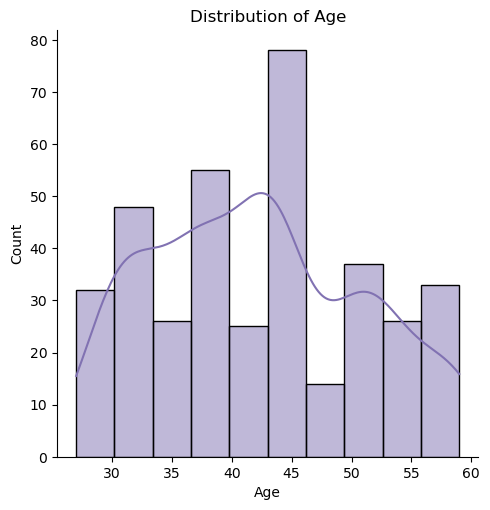

In [20]:
sns.displot(df.Age ,kde=True,color="#8172B2")
plt.title('Distribution of Age');

- The distribution appears to be right-skewed, meaning there are more people in younger age groups than in older age groups.
- The KDE line shows a mode (peak) at around 40-45 years old.

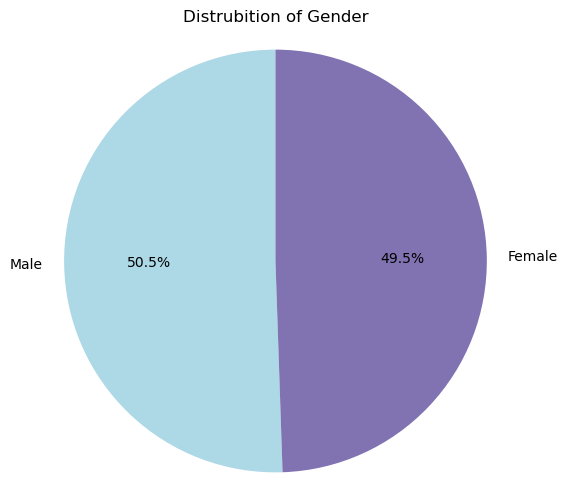

In [21]:
Gender_Count=df["Gender"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(Gender_Count,labels=Gender_Count.index,autopct="%1.1f%%",colors=['lightblue','#8172B2'], startangle=90)
plt.title("Distrubition of Gender");
plt.axis("equal");

- This pie chart displays the distribution of gender in the dataset. According to the chart, 50.5% of the individuals are male, while 49.5% are female.

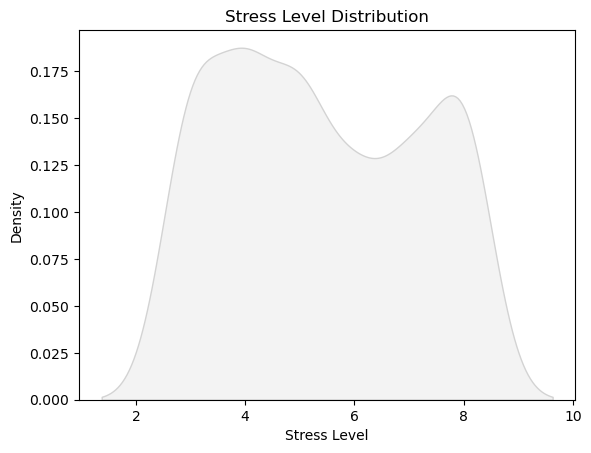

In [22]:
sns.kdeplot(df['Stress Level'], shade=True, color='lightgrey')
plt.title('Stress Level Distribution');

- It can be inferred from the graph that the average and median stress levels lie between 0.5 and 1.0, the stress levels follow a normal distribution, and there exists some variability in stress levels.

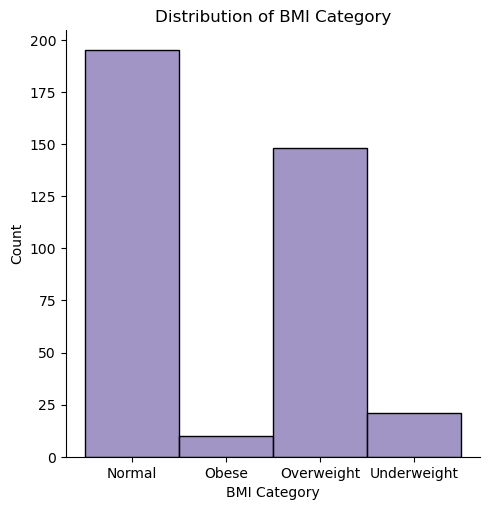

In [23]:
sns.displot(df["BMI Category"], kde=False, color="#8172B2").set(title="Distribution of BMI Category");

- In our data, we see that the majority are normal weight, followed by overweight.

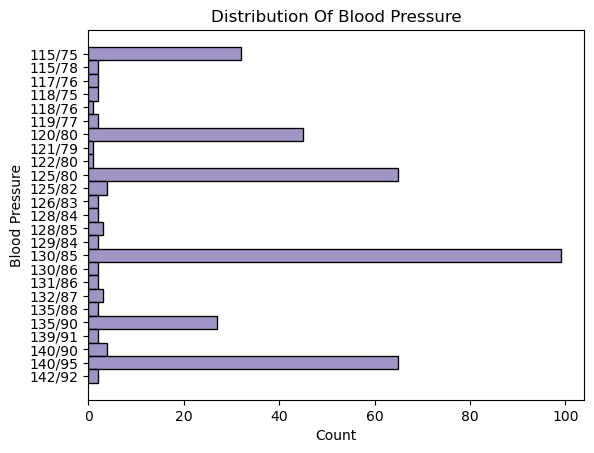

In [24]:
sns.histplot(data=df, y="Blood Pressure", kde=False, color="#8172B2")
plt.xlabel('Count')
plt.ylabel('Blood Pressure')
plt.title('Distribution Of Blood Pressure');

- The concentration of data points around the center of the graph suggests that most individuals have blood pressure readings within the normal range. However, there is also a noticeable presence of data points towards the upper and lower ends of the blood pressure ranges, indicating that some individuals have elevated or low blood pressure.

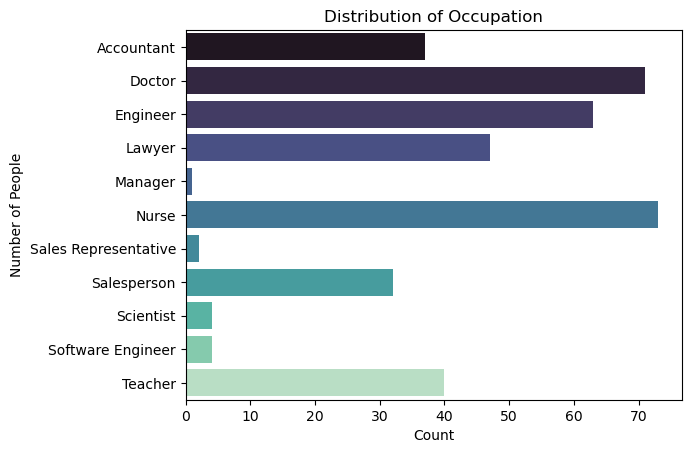

In [25]:
occupation_counts = df['Occupation'].value_counts().reset_index()
occupation_counts.columns = ['Occupation', 'Count']

ocu = sns.barplot(x='Count', y='Occupation', data=occupation_counts, palette="mako")
ocu.set_title("Distribution of Occupation");
ocu.set_ylabel("Number of People");

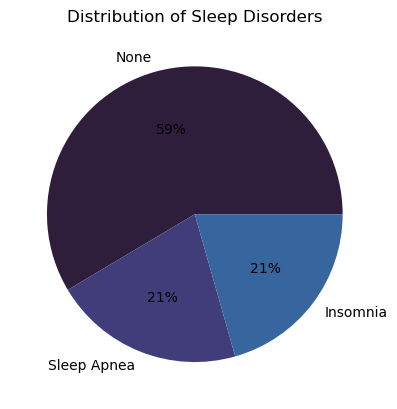

In [26]:
sleep_disorder = df['Sleep Disorder'].value_counts()
plt.pie(sleep_disorder, labels=sleep_disorder.index, autopct='%.0f%%', colors=sns.color_palette("mako"))
plt.title('Distribution of Sleep Disorders');

The distribution of insomnia and sleep apnea is equal.

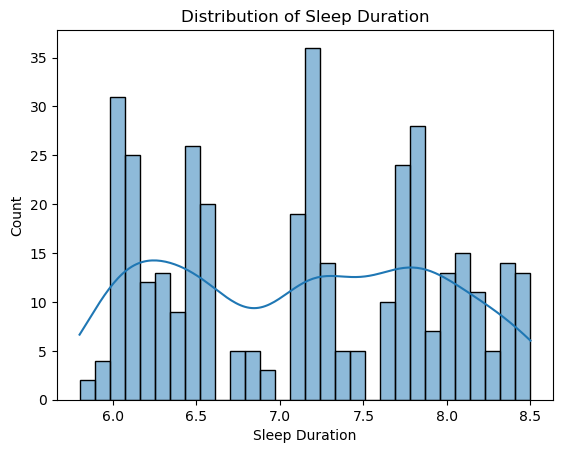

In [27]:
sns.histplot(df['Sleep Duration'], bins=30, kde=True)
plt.title('Distribution of Sleep Duration');

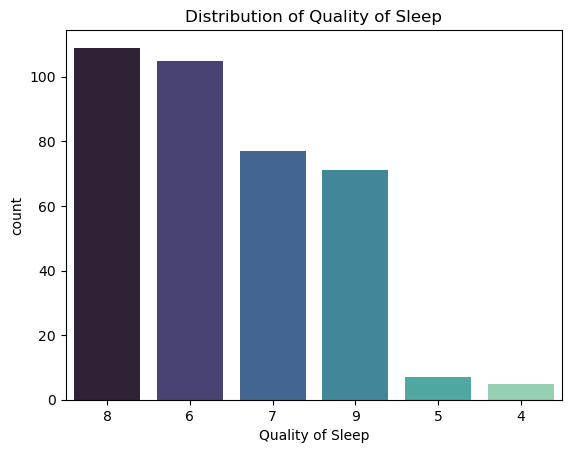

In [28]:
sns.countplot(x='Quality of Sleep', data=df, palette = "mako", order=df['Quality of Sleep'].value_counts().index)
plt.title('Distribution of Quality of Sleep');

Most individuals have a sleep quality rating of 8, while a minority have a sleep quality rating of 4 or 5.

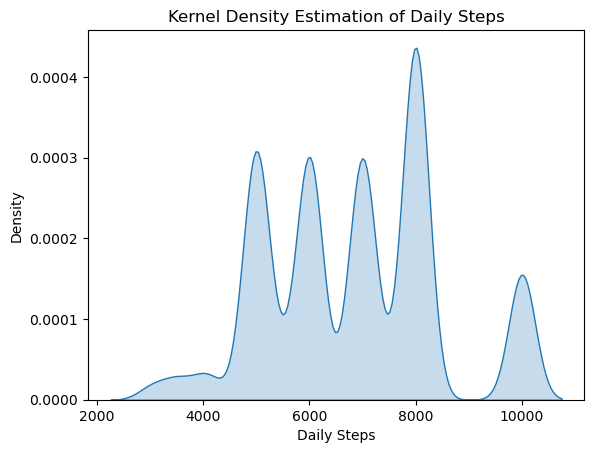

In [29]:
sns.kdeplot(x='Daily Steps', data=df, fill=True, bw_adjust=0.5, palette='mako')
plt.title('Kernel Density Estimation of Daily Steps');

## Correlation

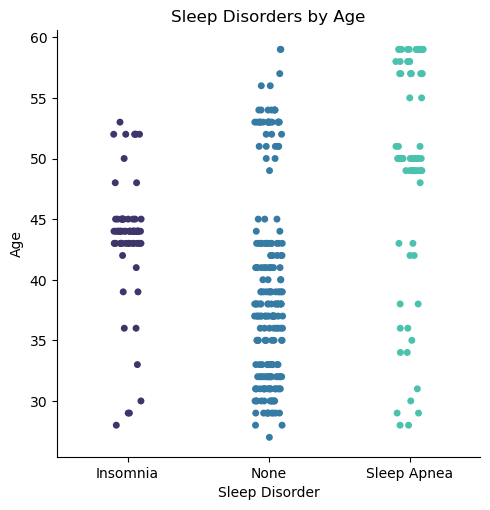

In [30]:
sns.catplot(y=df.Age,x="Sleep Disorder", data=df,palette="mako");
plt.title('Sleep Disorders by Age');

- Insomnia is not common in people aged 55 and over.
- People with sleep apnea tend to be older, with the majority being over 45 years old.

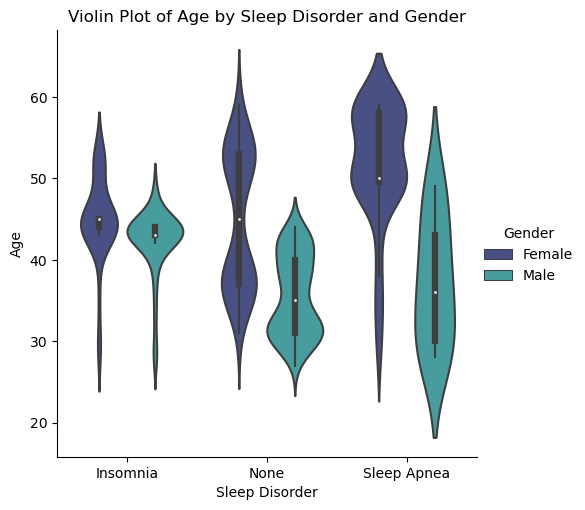

In [31]:
sns.catplot(x="Sleep Disorder", y="Age", hue="Gender", kind="violin", data=df, palette="mako")
plt.title("Violin Plot of Age by Sleep Disorder and Gender");

Age distribution by sleep disorder:

- **Insomnia**: The age distribution for insomnia peaks around 30 and 50 years old, suggesting it may be more common in both younger and older adults.
- **None**: Individuals without sleep disorders show a relatively even distribution across all ages, indicating that sleep disorders are not limited to any particular age group.
- **Sleep apnea**: The age distribution for individuals with sleep apnea is skewed towards older adults, with a peak around 60 years old, implying it may be more prevalent in this age group.

Age distribution by gender:

- **Female**: The age distribution for females is relatively evenly distributed across all ages.
- **Male**: The age distribution for males is skewed towards older adults, with a peak around 60 years old, suggesting they may be more likely to develop sleep disorders as they age.

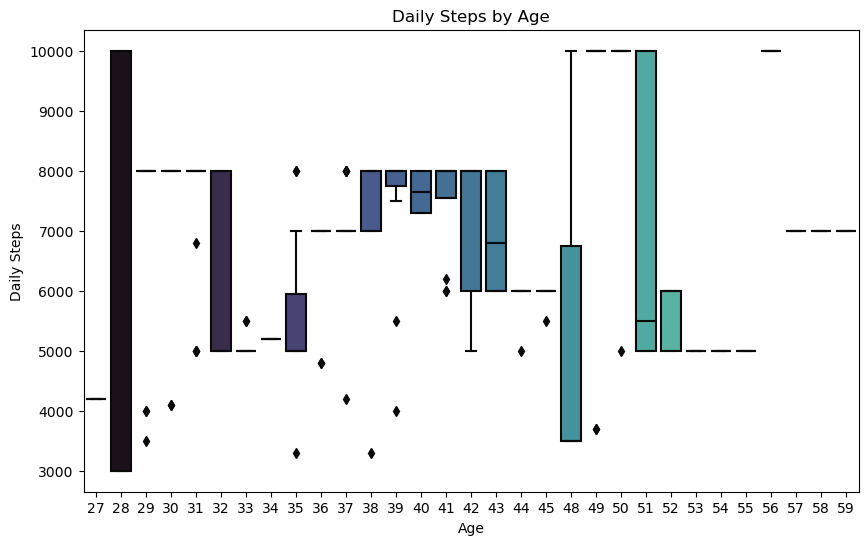

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df.Age,y="Daily Steps",data=df,palette="mako").set_title("Daily Steps by Age");

**Age 27-30:** Daily steps are generally high, with age 27 having around 10,000 steps.
 
**Age 31-35:** A noticeable decrease in daily steps, except for age 32.

**Age 37-41:** Steps increase again, especially at ages 38 and 39 (around 6,000-7,000 steps).

**Age 42-49:** High variability, particularly at age 49.

**Age 50-59:** Age 51 shows a high step count (~9,000), but steps decrease significantly at age 52 and beyond.


* Younger age groups (especially in the late 20s) tend to have higher daily steps.
* There are fluctuations in daily steps with some age groups showing significant increases or decreases.
* Generally, a decreasing trend in daily steps is observed with increasing age.

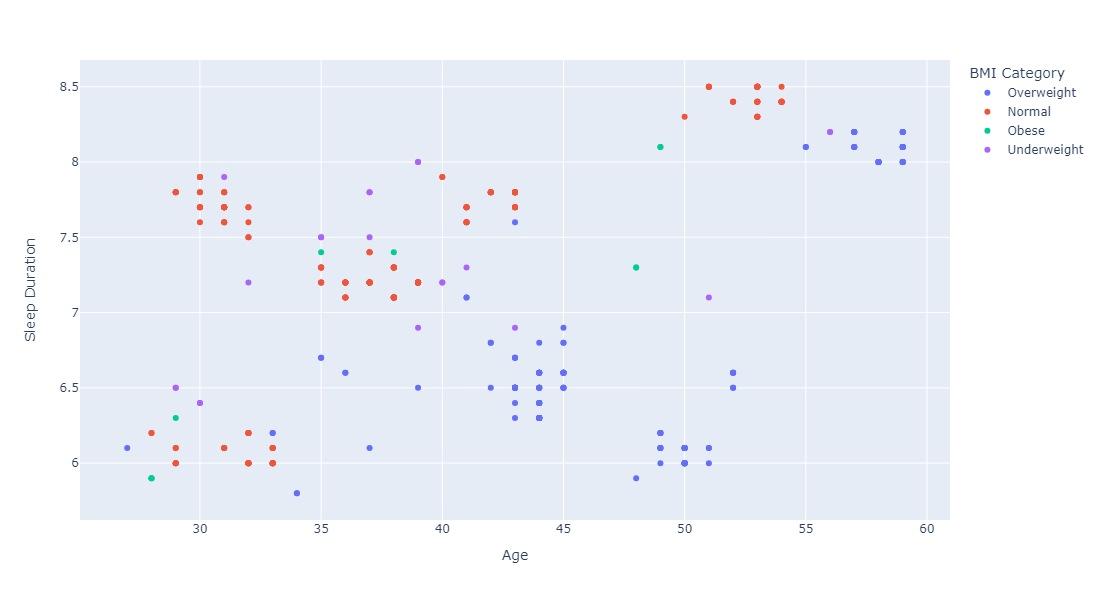

In [33]:
import plotly.express as px
def plotly_scatter(df , numerical_column_one, numerical_column_two ,
                   color = None  , row = None , col =None) :
    fig = px.scatter(df, 
                     x=numerical_column_one,
                     y=numerical_column_two,
                     facet_col=col,
                     color =color,
                     facet_row=row , height = 600
                    )
    fig.update_yaxes(showticklabels=True , matches=None ,)
    fig.update_xaxes(showticklabels=True , matches=None)
    fig.show()
plotly_scatter(df, "Age", "Sleep Duration",color="BMI Category")

* People aged 55-60 who sleep more than 8 hours are prone to being overweight.
* People aged 35-55 who sleep less than 7 hours tend to be overweight.
* People aged 50-55 who sleep more than 8 hours have a normal weight.
* Most people under the age of 40 have a normal weight.

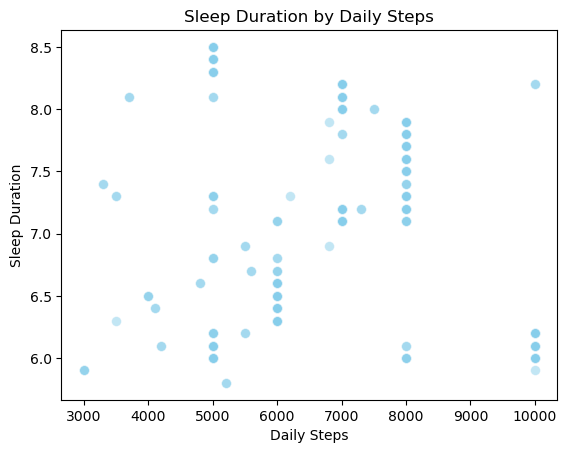

In [34]:
sns.scatterplot(x='Daily Steps', y='Sleep Duration', data=df, alpha=0.5, s=50, color='skyblue')
plt.title('Sleep Duration by Daily Steps');

- There appears to be a weak positive correlation between sleep duration and daily steps. This means that as the number of daily steps increases, sleep duration tends to increase as well. However, this relationship is not strong, and there is a considerable amount of variability in the data.
- There are a few outliers in the data, which are data points that fall far from the main trend. These outliers could be due to various factors, such as individual differences in sleep habits, health conditions, or measurement errors.

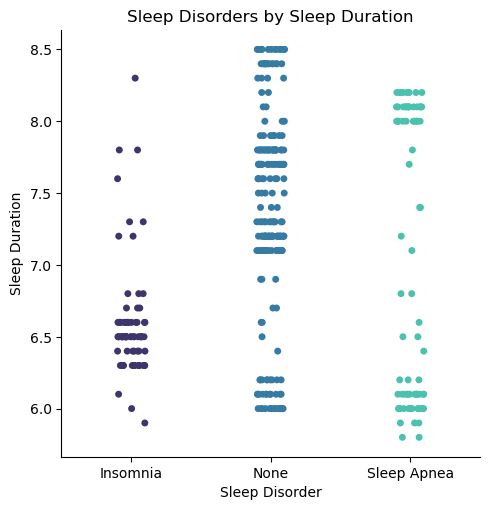

In [35]:
sns.catplot(x="Sleep Disorder",y="Sleep Duration",data=df,palette="mako");
plt.title('Sleep Disorders by Sleep Duration');

- **Insomnia:** Individuals with insomnia have an average sleep duration of **6.5 hours**.
- **No sleep disorder:** Individuals with no sleep disorder have an average sleep duration of **7.5 hours**.
- **Sleep apnea:** Individuals with sleep apnea have an average sleep duration of **7 hours**.


- The data suggests that sleep disorder type can affect average sleep duration. Individuals with insomnia sleep the least compared to other sleep disorder types. Individuals with no sleep disorder have the longest average sleep duration. Individuals with sleep apnea sleep slightly longer than those with insomnia but slightly shorter than those with no sleep disorder. 

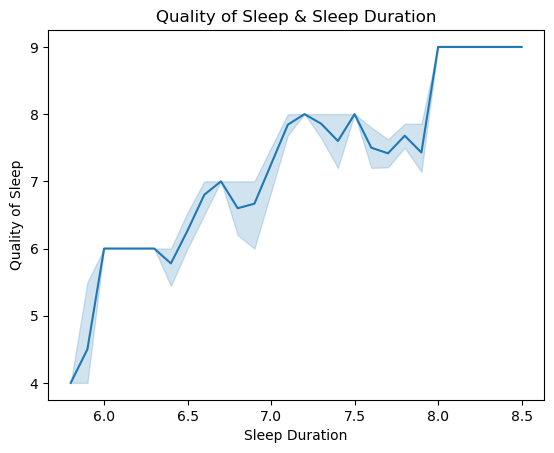

In [36]:
sns.lineplot(x="Sleep Duration", y="Quality of Sleep", data=df);
plt.title("Quality of Sleep & Sleep Duration");


- There is a general positive correlation between sleep duration and sleep quality. In other words, as sleep duration increases, so does sleep quality.

- However, this relationship is not linear. Sleep quality increases to a certain point as sleep duration increases, and then begins to decrease. This indicates that the recommended ideal sleep duration for adults is around 7-8 hours. Sleeping less or more can negatively impact sleep quality.

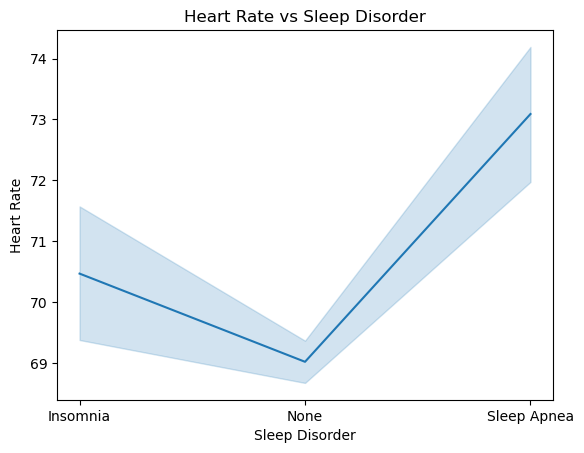

In [37]:
sns.lineplot(x='Sleep Disorder', 
             y='Heart Rate',  
             palette ="mako",
             data=df)
plt.title('Heart Rate vs Sleep Disorder');

- As observed, the heart rate of individuals with sleep disorders is higher than those without sleep disorders. This indicates that sleep disorders can create stress on the heart and lead to an increase in heart rate.

- Sleep apnea is a sleep disorder in which breathing temporarily stops. During sleep apnea, heart rate rises and falls, which can put stress on the heart.

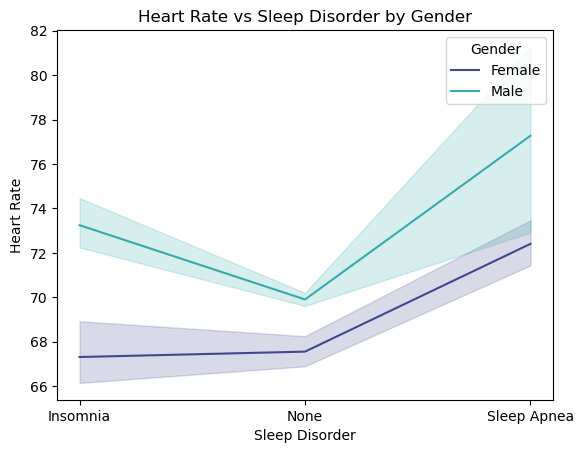

In [38]:
sns.lineplot(x='Sleep Disorder', 
             y='Heart Rate', 
             hue="Gender",
             palette ="mako",
             markers=True,
             dashes=False,
             data=df)
plt.title('Heart Rate vs Sleep Disorder by Gender');

- Based on the data, it's observed that men generally have a higher heart rate compared to women.

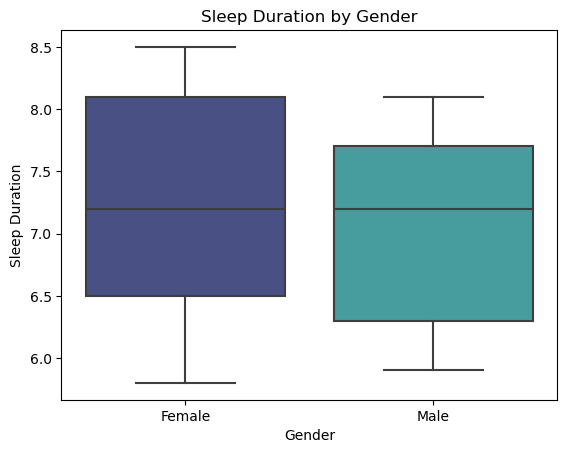

In [39]:
sns.boxplot(x='Gender', y='Sleep Duration', palette = "mako", data=df)
plt.title('Sleep Duration by Gender');

- Even though men and women typically sleep for the same average duration, but women tend to have longer maximum sleep durations compared to men.

> **Creating age gropus**

In [40]:
df['Age_grp'] = pd.cut(df['Age'], [20, 30, 40, 50, 60], labels=['20s', '30s', '40s', '50s'])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Person ID                374 non-null    int64   
 1   Gender                   374 non-null    category
 2   Age                      374 non-null    int64   
 3   Occupation               374 non-null    category
 4   Sleep Duration           374 non-null    float64 
 5   Quality of Sleep         374 non-null    int64   
 6   Physical Activity Level  374 non-null    int64   
 7   Stress Level             374 non-null    int64   
 8   BMI Category             374 non-null    category
 9   Blood Pressure           374 non-null    category
 10  Heart Rate               374 non-null    int64   
 11  Daily Steps              374 non-null    int64   
 12  Sleep Disorder           374 non-null    category
 13  Age_grp                  374 non-null    category
dtypes: categor

We add Age_grp column to our dataset

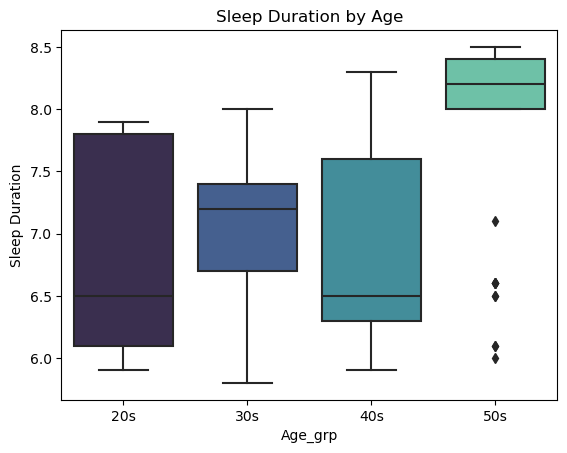

In [42]:
sns.boxplot(x='Age_grp', y='Sleep Duration', palette = "mako", data=df)
plt.title('Sleep Duration by Age');

- While most people in their 50s tend to sleep longer, there are some outliers within this age group. 

- Also, people in their 20s and 40s exhibit similar average sleep durations, yet people in their 20s tend to have a higher frequency of longer sleep durations compared to those in their 40s.

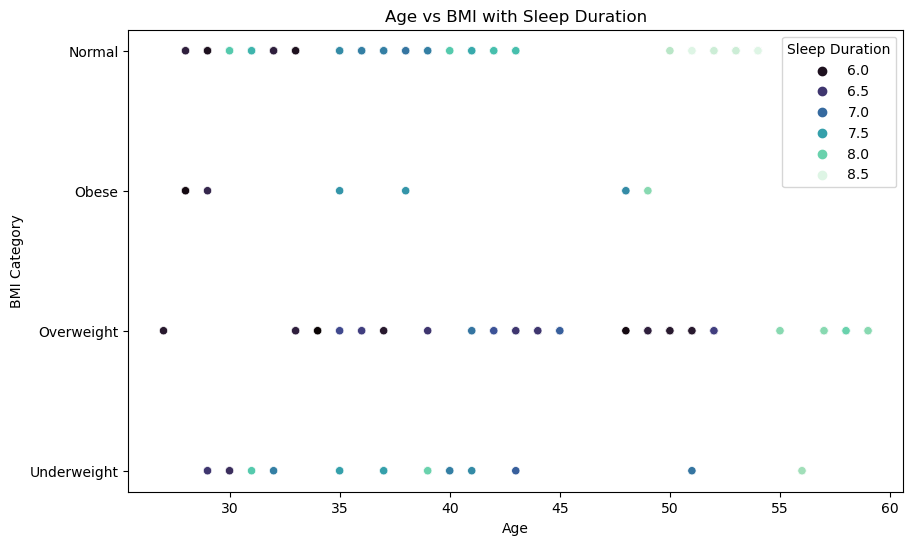

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='BMI Category', hue='Sleep Duration', data=df, palette='mako')
plt.legend(title='Sleep Duration', loc='upper right')
plt.title('Age vs BMI with Sleep Duration');

* The scatter plot provides an overview of the distribution of individuals' ages, BMI categories, and their sleep durations.
* There is a wide range of sleep durations within each BMI category, indicating no clear pattern of sleep duration specific to BMI categories or age groups.


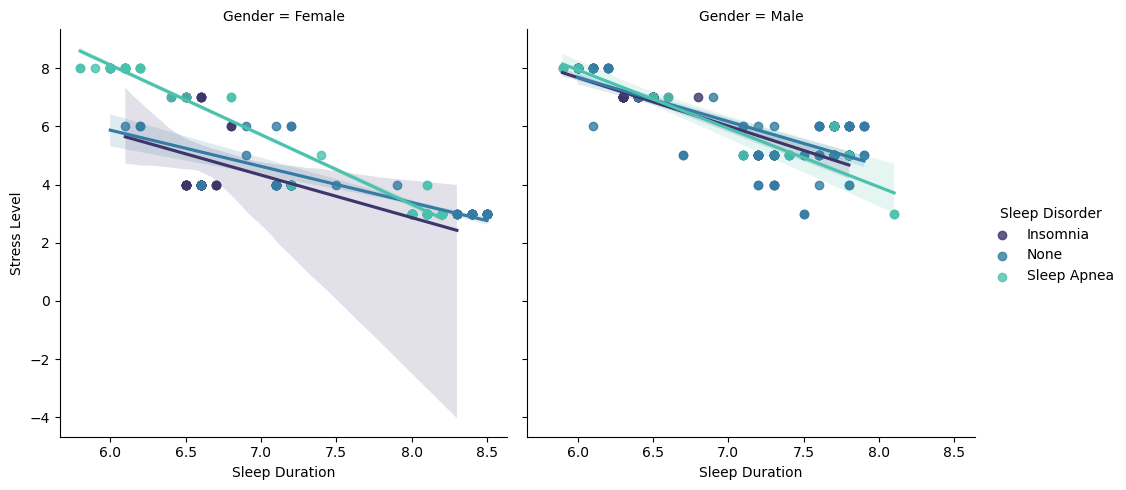

In [44]:
sns.lmplot(x="Sleep Duration", y="Stress Level", hue="Sleep Disorder", col="Gender", palette="mako",data=df);

* The graph suggests that longer sleep duration can reduce stress levels in both females and males.
* Individuals without sleep disorders tend to have lower stress levels.
* Sleep disorders, particularly insomnia and sleep apnea, are associated with higher stress levels.

In [45]:
# Grouping the data by "Sleep Disorder", "Stress Level", and "Gender"
grouped_data = df.groupby(["Sleep Disorder", "Stress Level", "Gender"]).size().reset_index(name="Count")

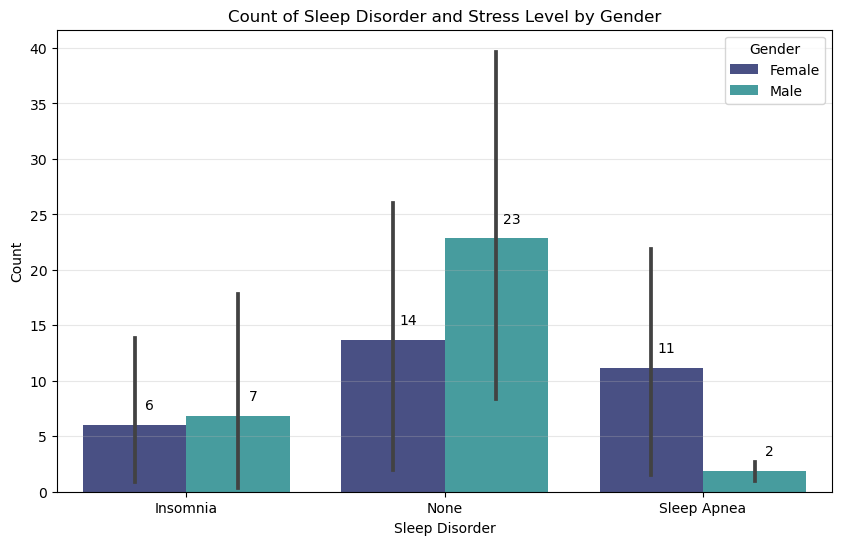

In [46]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Sleep Disorder", y="Count", hue="Gender", palette="mako", data=grouped_data)
plt.title("Count of Sleep Disorder and Stress Level by Gender")
plt.grid(axis='y', alpha=0.3)


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', 
                xytext = (11, 9), 
                textcoords = 'offset points')

- Sleep apnea is more common among femsles than males.

- The visualization suggests that females experience sleep disorders more frequently than males.

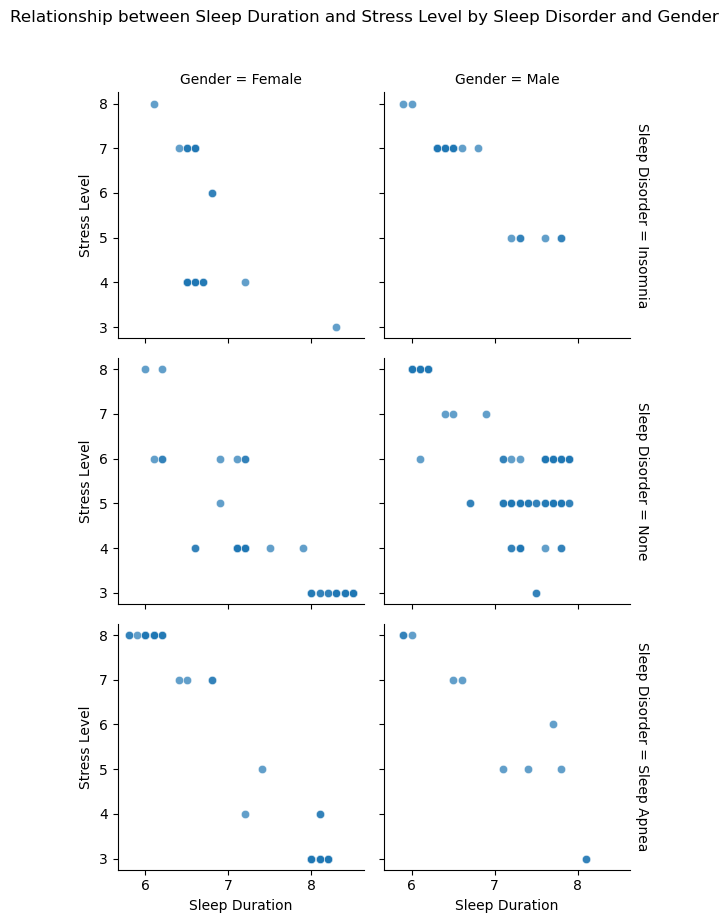

In [47]:
# Create a FacetGrid
g = sns.FacetGrid(df, col="Gender", row="Sleep Disorder", palette = 'make', margin_titles=True)

# Map a scatter plot to the FacetGrid
g.map(sns.scatterplot, "Sleep Duration", "Stress Level", alpha=0.7)

# Set titles
g.fig.suptitle('Relationship between Sleep Duration and Stress Level by Sleep Disorder and Gender', y=1.02)
g.set_axis_labels("Sleep Duration", "Stress Level")

# Adjust layout
plt.tight_layout()
plt.show()


**Relationship Between Sleep Duration and Stress Level**
- For both sexes, as sleep duration increases, stress level decreases.
- People who sleep less than 7 hours have the highest stress levels.
- People who sleep more than 8 hours have the lowest stress levels.

**Sleep Duration and Stress Level by Sleep Disorder**
- **Insomnia:** People with insomnia have the shortest sleep duration and the highest stress levels.
- **Sleep apnea:** People with sleep apnea have average sleep duration and moderate stress levels.
- **None**: People without sleep disorders have the longest sleep duration and the lowest stress levels.

**Sleep Duration and Stress Level by Gender**
- Women have shorter sleep duration than men.
- Women have higher stress levels than men.

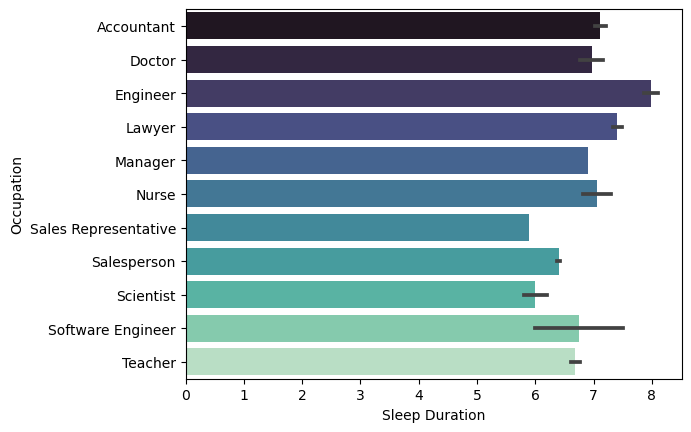

In [48]:
sns.barplot(x='Sleep Duration', y='Occupation', data=df ,palette="mako");

* This bar plot provides an overview of how average sleep duration varies across different occupations.
* Engineers tend to get the most sleep on average, while several other occupations have slightly shorter average sleep durations, typically around 6.5 to 7 hours.

In [49]:
occupation_counts = df['Occupation'].value_counts()
occupation_counts

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

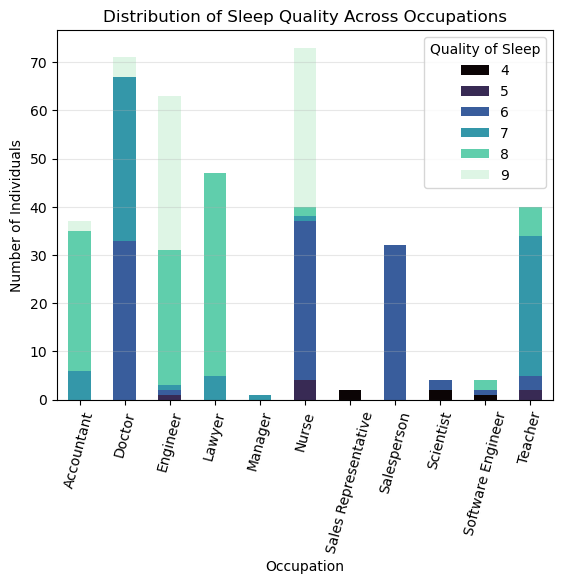


 Quality of Sleep      4  5   6   7   8   9
Occupation                                
Accountant            0  0   0   6  29   2
Doctor                0  0  33  34   0   4
Engineer              0  1   1   1  28  32
Lawyer                0  0   0   5  42   0
Manager               0  0   0   1   0   0
Nurse                 0  4  33   1   2  33
Sales Representative  2  0   0   0   0   0
Salesperson           0  0  32   0   0   0
Scientist             2  0   2   0   0   0
Software Engineer     1  0   1   0   2   0
Teacher               0  2   3  29   6   0


In [50]:
occupation_counts = df['Occupation'].value_counts()
occupation_sleep_counts = df.groupby(['Occupation', 'Quality of Sleep']).size().unstack(fill_value=0)

occupation_sleep_counts.plot(kind='bar', stacked=True, cmap='mako')
plt.title('Distribution of Sleep Quality Across Occupations')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=75)
plt.legend(title='Quality of Sleep', loc='upper right')
plt.grid(axis='y', alpha=0.3)
plt.show()

print('\n',occupation_sleep_counts)

* The occupations with the highest sleep quality are engineers and nurses.
* Some occupational groups have higher sleep quality compared to others. For instance, nurses and teachers appear to have better sleep quality compared to accountants and doctors.
* The distribution of sleep quality categories varies across different occupational groups. In some occupational groups, there is a higher concentration of individuals in a specific sleep quality category. For example, accountants and doctors have more individuals in the "Poor" sleep quality category, while sales representatives and salespersons tend to concentrate in the "Fair" sleep quality category.

Contingency Table:
Occupation      Accountant  Doctor  Engineer  Lawyer  Manager  Nurse  \
Sleep Disorder                                                         
Insomnia                 7       3         5       2        0      3   
None                    30      64        57      42        1      9   
Sleep Apnea              0       4         1       3        0     61   

Occupation      Sales Representative  Salesperson  Scientist  \
Sleep Disorder                                                 
Insomnia                           0           29          0   
None                               0            2          2   
Sleep Apnea                        2            1          2   

Occupation      Software Engineer  Teacher  
Sleep Disorder                              
Insomnia                        1       27  
None                            3        9  
Sleep Apnea                     0        4  




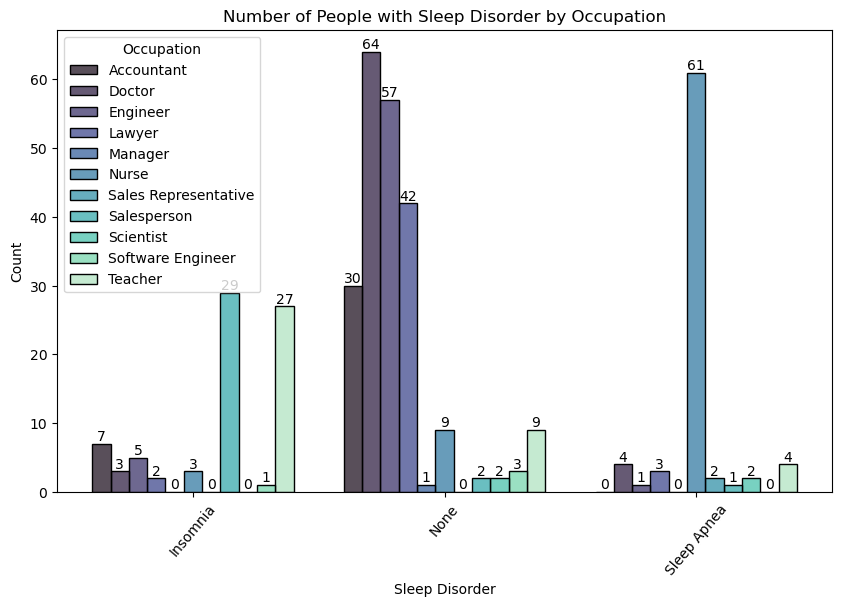

In [51]:
contingency_table = pd.crosstab(df['Sleep Disorder'], df['Occupation'])
print("Contingency Table:")
print(contingency_table)
print("\n")

plt.figure(figsize=(10,6))
ax = sns.histplot(data=df, x=df["Sleep Disorder"], hue=df['Occupation'], multiple="dodge",palette = "mako", shrink=.8)
plt.title("Number of People with Sleep Disorder by Occupation");
plt.xticks(rotation=50);
for i in ax.containers:
        ax.bar_label(i);

* The majority of peoples who doesn't have any sleep disorder individuals are doctors.
* In the case of sleep apnea, nurses constitute the majority.
* For insomnia, salespersons and teachers are predominant among individuals.

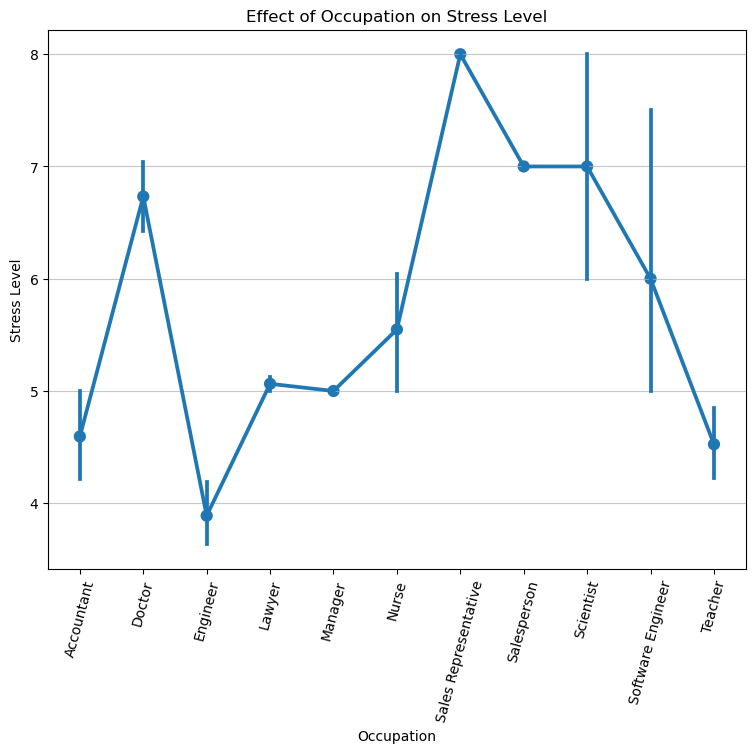

In [52]:
plt.figure(figsize=(9, 7))
sns.pointplot(x='Occupation', y='Stress Level', data=df)
plt.title('Effect of Occupation on Stress Level')
plt.xticks(rotation=75) 
plt.grid(axis='y', linestyle='-', alpha=0.7)  
plt.show()

* Certain occupations exhibit higher stress levels compared to others. Notably, occupations such as Accountants and Doctors seem to experience higher stress levels relative to Teachers and Nurses.
* Stress levels differ significantly across various occupations, highlighting diversity in occupational stress.

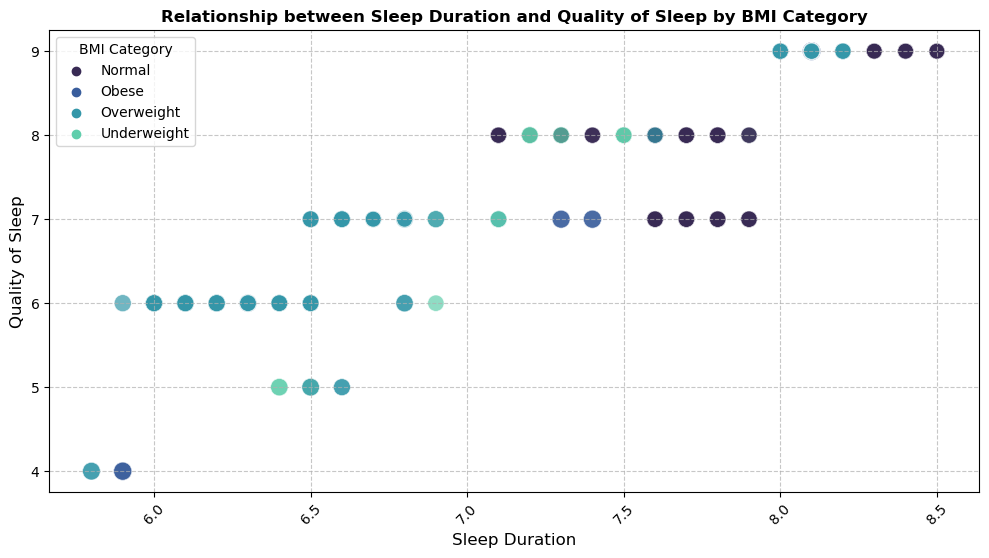

In [53]:
plt.figure(figsize=(12, 6))
scatter_plot = sns.scatterplot(x='Sleep Duration', 
                               y='Quality of Sleep', 
                               data=df, 
                               hue='BMI Category', 
                               palette='mako', 
                               s=df['Heart Rate']*2,
                               edgecolor='w',
                               alpha=0.7, 
                               linewidth=0.5)

plt.xticks(rotation=45)

plt.title('Relationship between Sleep Duration and Quality of Sleep by BMI Category', fontweight="bold")
plt.xlabel('Sleep Duration', fontsize=12)
plt.ylabel('Quality of Sleep', fontsize=12)
plt.legend(title='BMI Category', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)


**Normal BMI:** Those with a normal BMI have the longest sleep duration and the highest sleep quality compared to other BMI categories.

**Obese:** Obese individuals have the shortest sleep duration and the lowest sleep quality compared to other BMI categories.

**Overweight:** Overweight individuals have shorter sleep duration and lower sleep quality than those with a normal BMI.

**Underweight:** Underweight individuals have longer sleep duration and higher sleep quality than those with a normal BMI.


- Getting enough sleep is important for overall sleep quality.
- Sleep duration and sleep quality are lowest in obese individuals.
- Those with a normal BMI have the longest sleep duration and the highest sleep quality compared to other BMI categories.
- Sleep duration and sleep quality in underweight individuals are similar to those with a normal BMI.

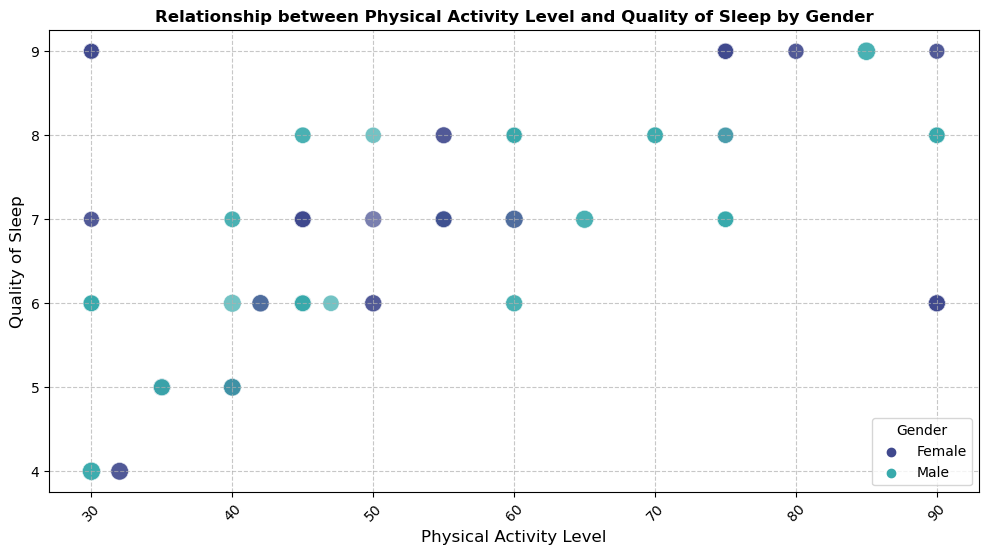

In [54]:
plt.figure(figsize=(12, 6))
scatter_plot = sns.scatterplot(x='Physical Activity Level', 
                               y='Quality of Sleep', 
                               data=df, 
                               hue='Gender', 
                               palette='mako', 
                               s=df['Heart Rate']*2,
                               edgecolor='w',
                               alpha=0.7, 
                               linewidth=0.5)

plt.xticks(rotation=45)

plt.title('Relationship between Physical Activity Level and Quality of Sleep by Gender', fontweight="bold")
plt.xlabel('Physical Activity Level', fontsize=12)
plt.ylabel('Quality of Sleep', fontsize=12)
plt.legend(title='Gender', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

- The women's curve is higher than the men's curve. This indicates that women, on average, are more physically active than men.
- The women's curve is steeper than the men's curve. This indicates that women, on average, sleep more deeply and uninterruptedly than men.
- There is a positive relationship between physical activity level and sleep quality. This can be seen from the direction of the curves in the graph. Both curves slope upward to the right. This indicates that as physical activity level increases, sleep quality also improves.

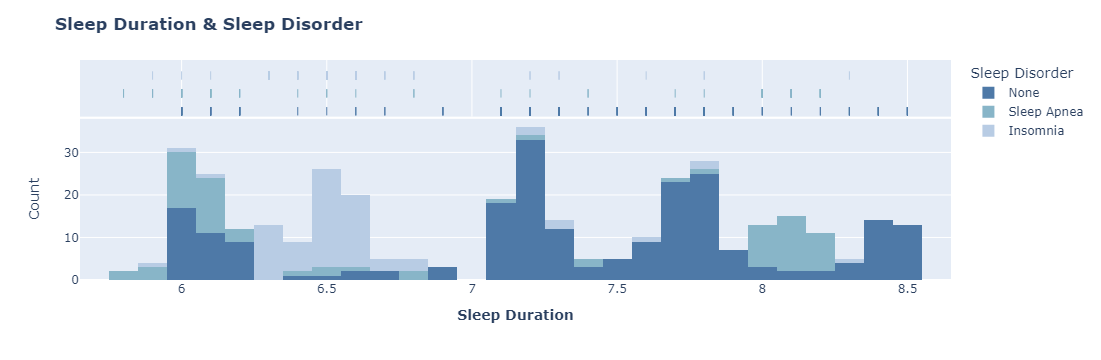

In [55]:
blue_palette = ["#4e79a7", "#88b5c8", "#b8cce4", "#f1e0bc", "#f7c97e", "#fdc086", "#f26d6d", "#d44e4e", "#9e4e4e"]
fig = px.histogram(df, x='Sleep Duration', color='Sleep Disorder', marginal='rug', nbins=30,color_discrete_sequence=blue_palette)
fig.update_layout(title='<b>Sleep Duration & Sleep Disorder<b>',
                  xaxis=dict(title='<b>Sleep Duration<b>'),
                  yaxis=dict(title='Count'),
                  legend=dict(title='Sleep Disorder'),
                  showlegend=True)
fig.show()

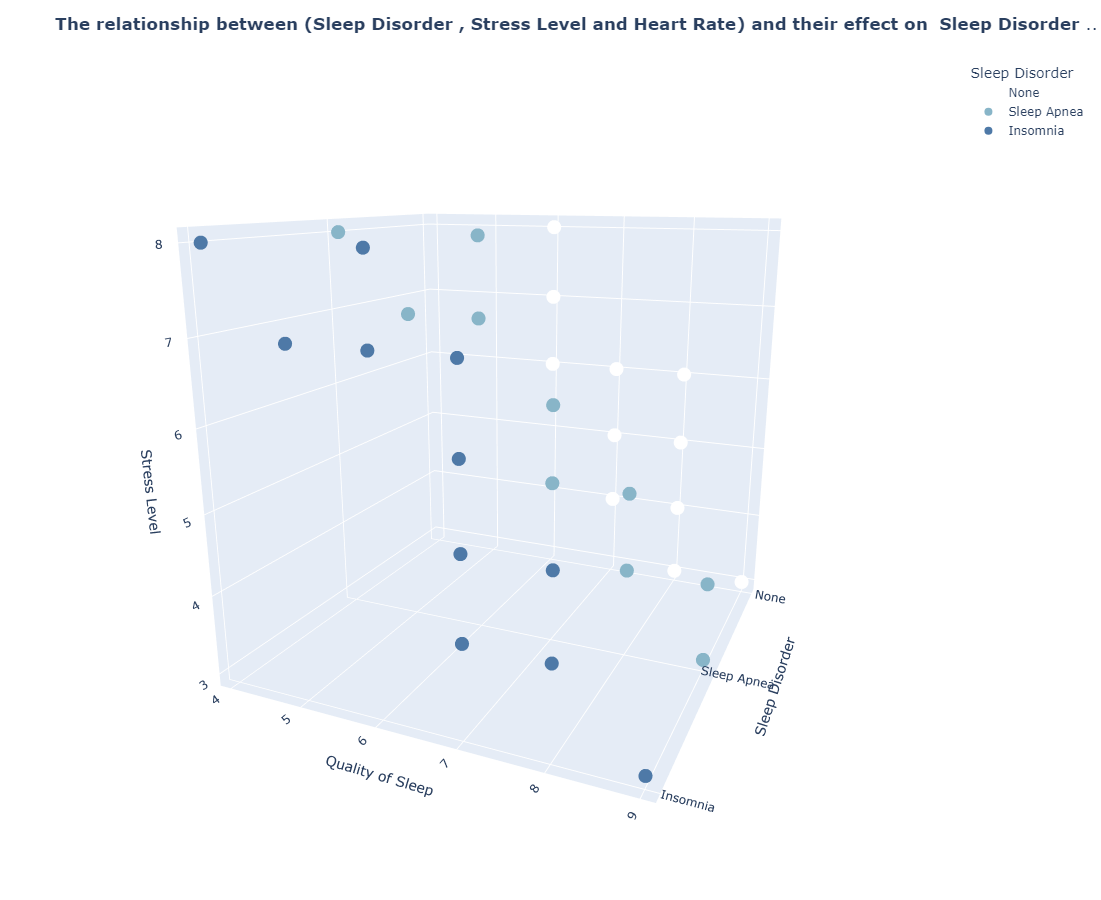

In [56]:
fig=px.scatter_3d(df,x='Sleep Disorder',y='Quality of Sleep',z='Stress Level',
                  color='Sleep Disorder',width=1000,height=900,
                  color_discrete_sequence=['white','#88b5c8','#4e79a7'])


fig.update_layout(title='<b>The relationship between (Sleep Disorder , Stress Level and Heart Rate) and their effect on  Sleep Disorder</b> ..',
                  showlegend=True)


fig.show()

**Obese** individuals have higher blood pressure and heart rate compared to normal-weight individuals.

**Overweight** individuals have higher blood pressure and heart rate compared to normal-weight individuals.

**Underweight** individuals have lower blood pressure and heart rate compared to normal-weight individuals.

Individuals with **insomnia** have higher blood pressure and heart rate compared to those without sleep disorders.

Individuals with **sleep apnea** have higher blood pressure and heart rate compared to those without sleep disorders.

- Maintaining a healthy weight and establishing a healthy sleep pattern can help reduce the risk of heart disease and other health problems.

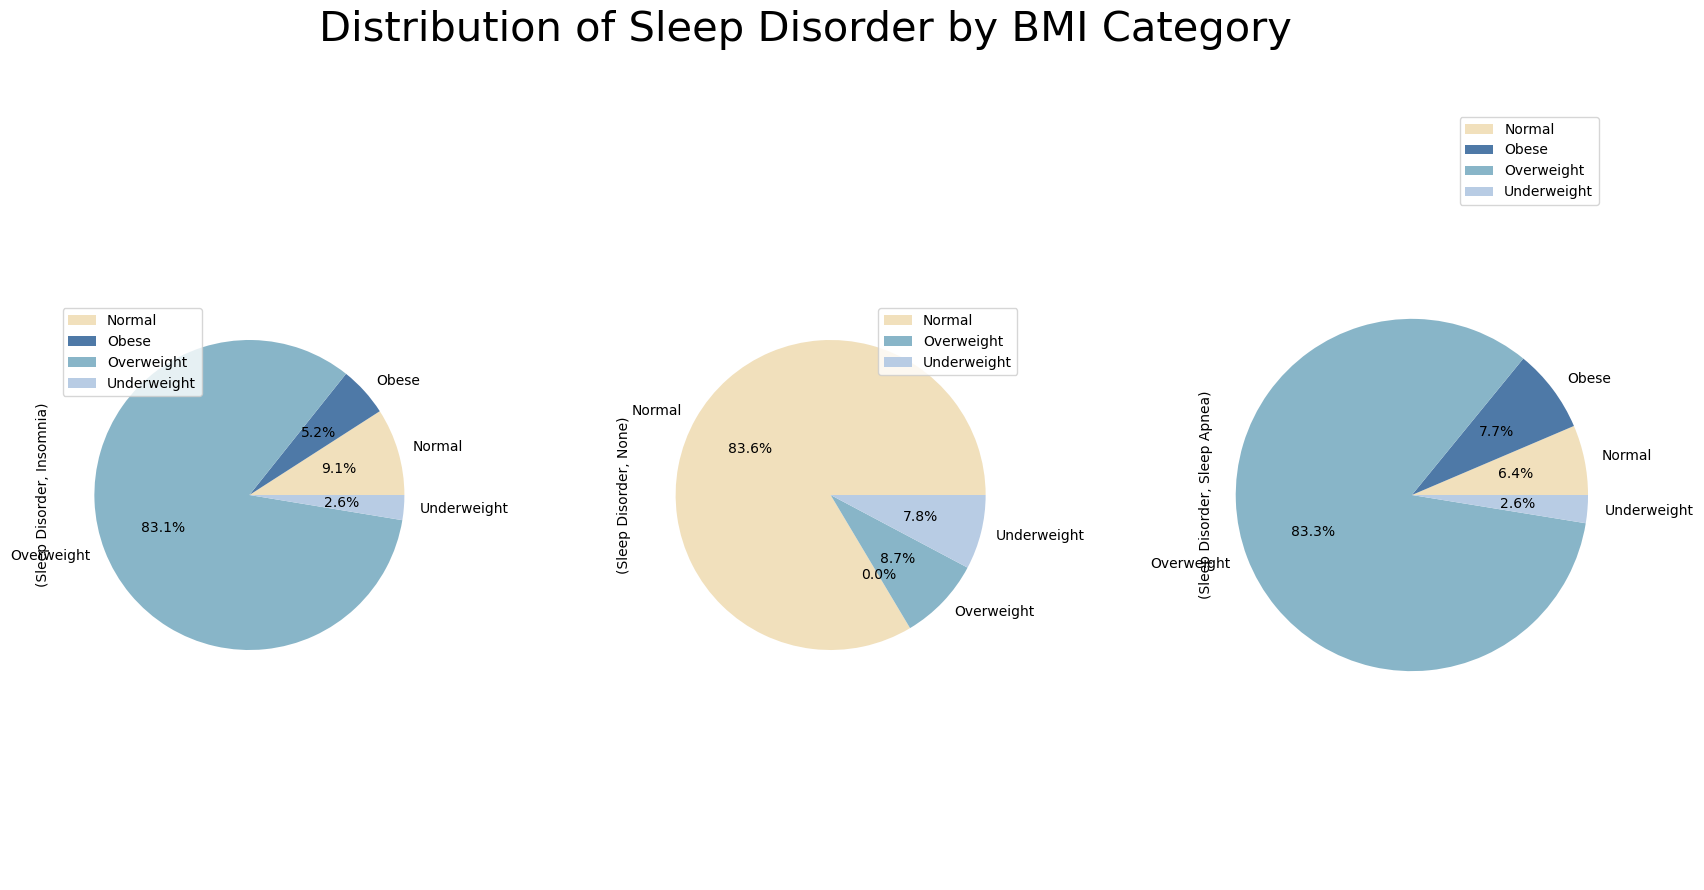

In [57]:
import matplotlib.pyplot as plt

# Pivot table
pivot_df = df.pivot_table(index='BMI Category',
                          columns='Sleep Disorder',
                          aggfunc={'Sleep Disorder':'count'})

# Pie chart
fig, ax = plt.subplots(figsize=(20, 10))
pivot_df.plot.pie(autopct ='%1.1f%%', 
                  subplots=True, 
                  ax=ax,
                  colors=["#f1e0bc","#4e79a7", "#88b5c8", "#b8cce4"])

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)

plt.suptitle('Distribution of Sleep Disorder by BMI Category', fontsize=30)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

plt.show()


The pie charts depict the distribution of different sleep disorders (None, Sleep Apnea, and Insomnia) across various BMI categories.

- **Insomnia**: 83.1% of individuals with insomnia are overweight.
- **None**: None of the individuals without sleep disorders are obese.
- **Sleep Apnea**: 83.3% of individuals with sleep apnea are overweight.

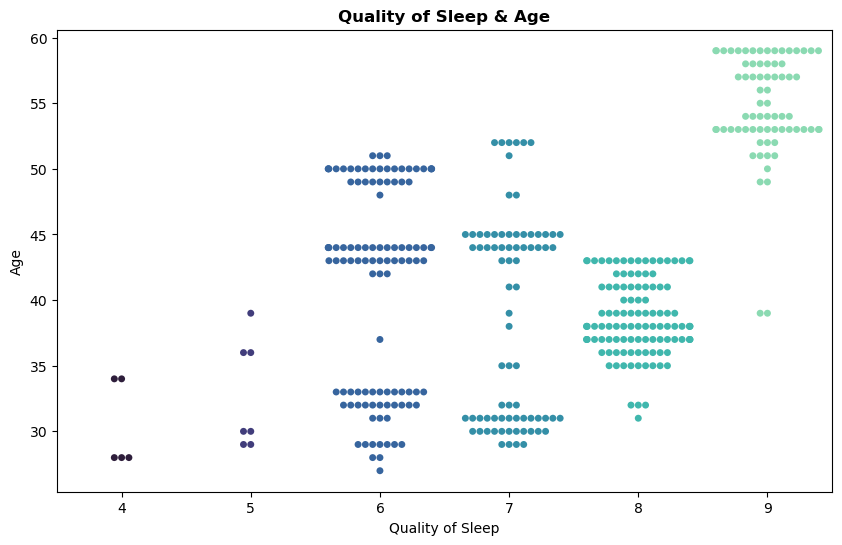

In [58]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Quality of Sleep', y='Age', data=df,palette="mako")
plt.title('Quality of Sleep & Age', fontweight='bold')
plt.xlabel('Quality of Sleep')
plt.ylabel('Age')
plt.show()

- The swarm plot shows the relationship between age and quality of sleep. It indicates that older individuals tend to have higher quality sleep. This can be observed by the concentration of data points for higher sleep quality ratings among older age groups

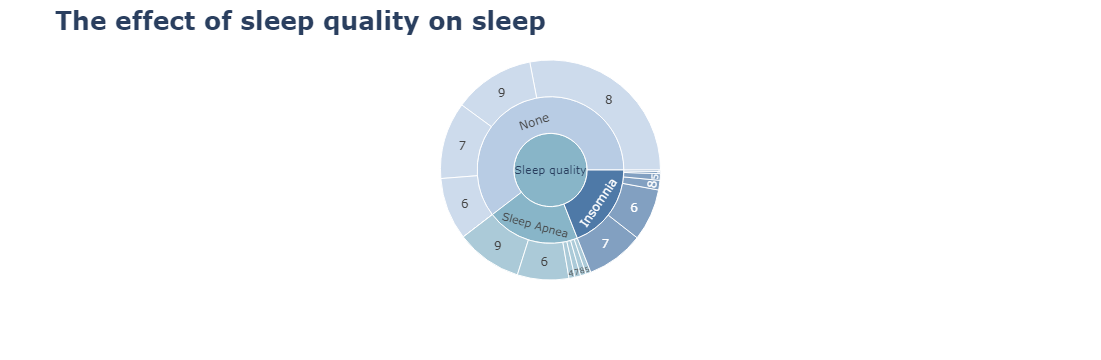

In [59]:
fig=px.sunburst(df,path=[px.Constant('Sleep quality'),'Sleep Disorder','Quality of Sleep'],
               color='Sleep Disorder',values='Sleep Duration',
              color_discrete_sequence=["#4e79a7", "#88b5c8", "#b8cce4"],)

fig.update_layout(title='<b>The effect of sleep quality on sleep </b>',
                 title_font={'size':25})
fig.show()

- As sleep quality improves, instances of sleep disorders decrease. However, among individuals experiencing sleep disorders, even with a good sleep quality score, a decrease in sleep duration is observed. This distinction sets them apart from those without sleep problems.

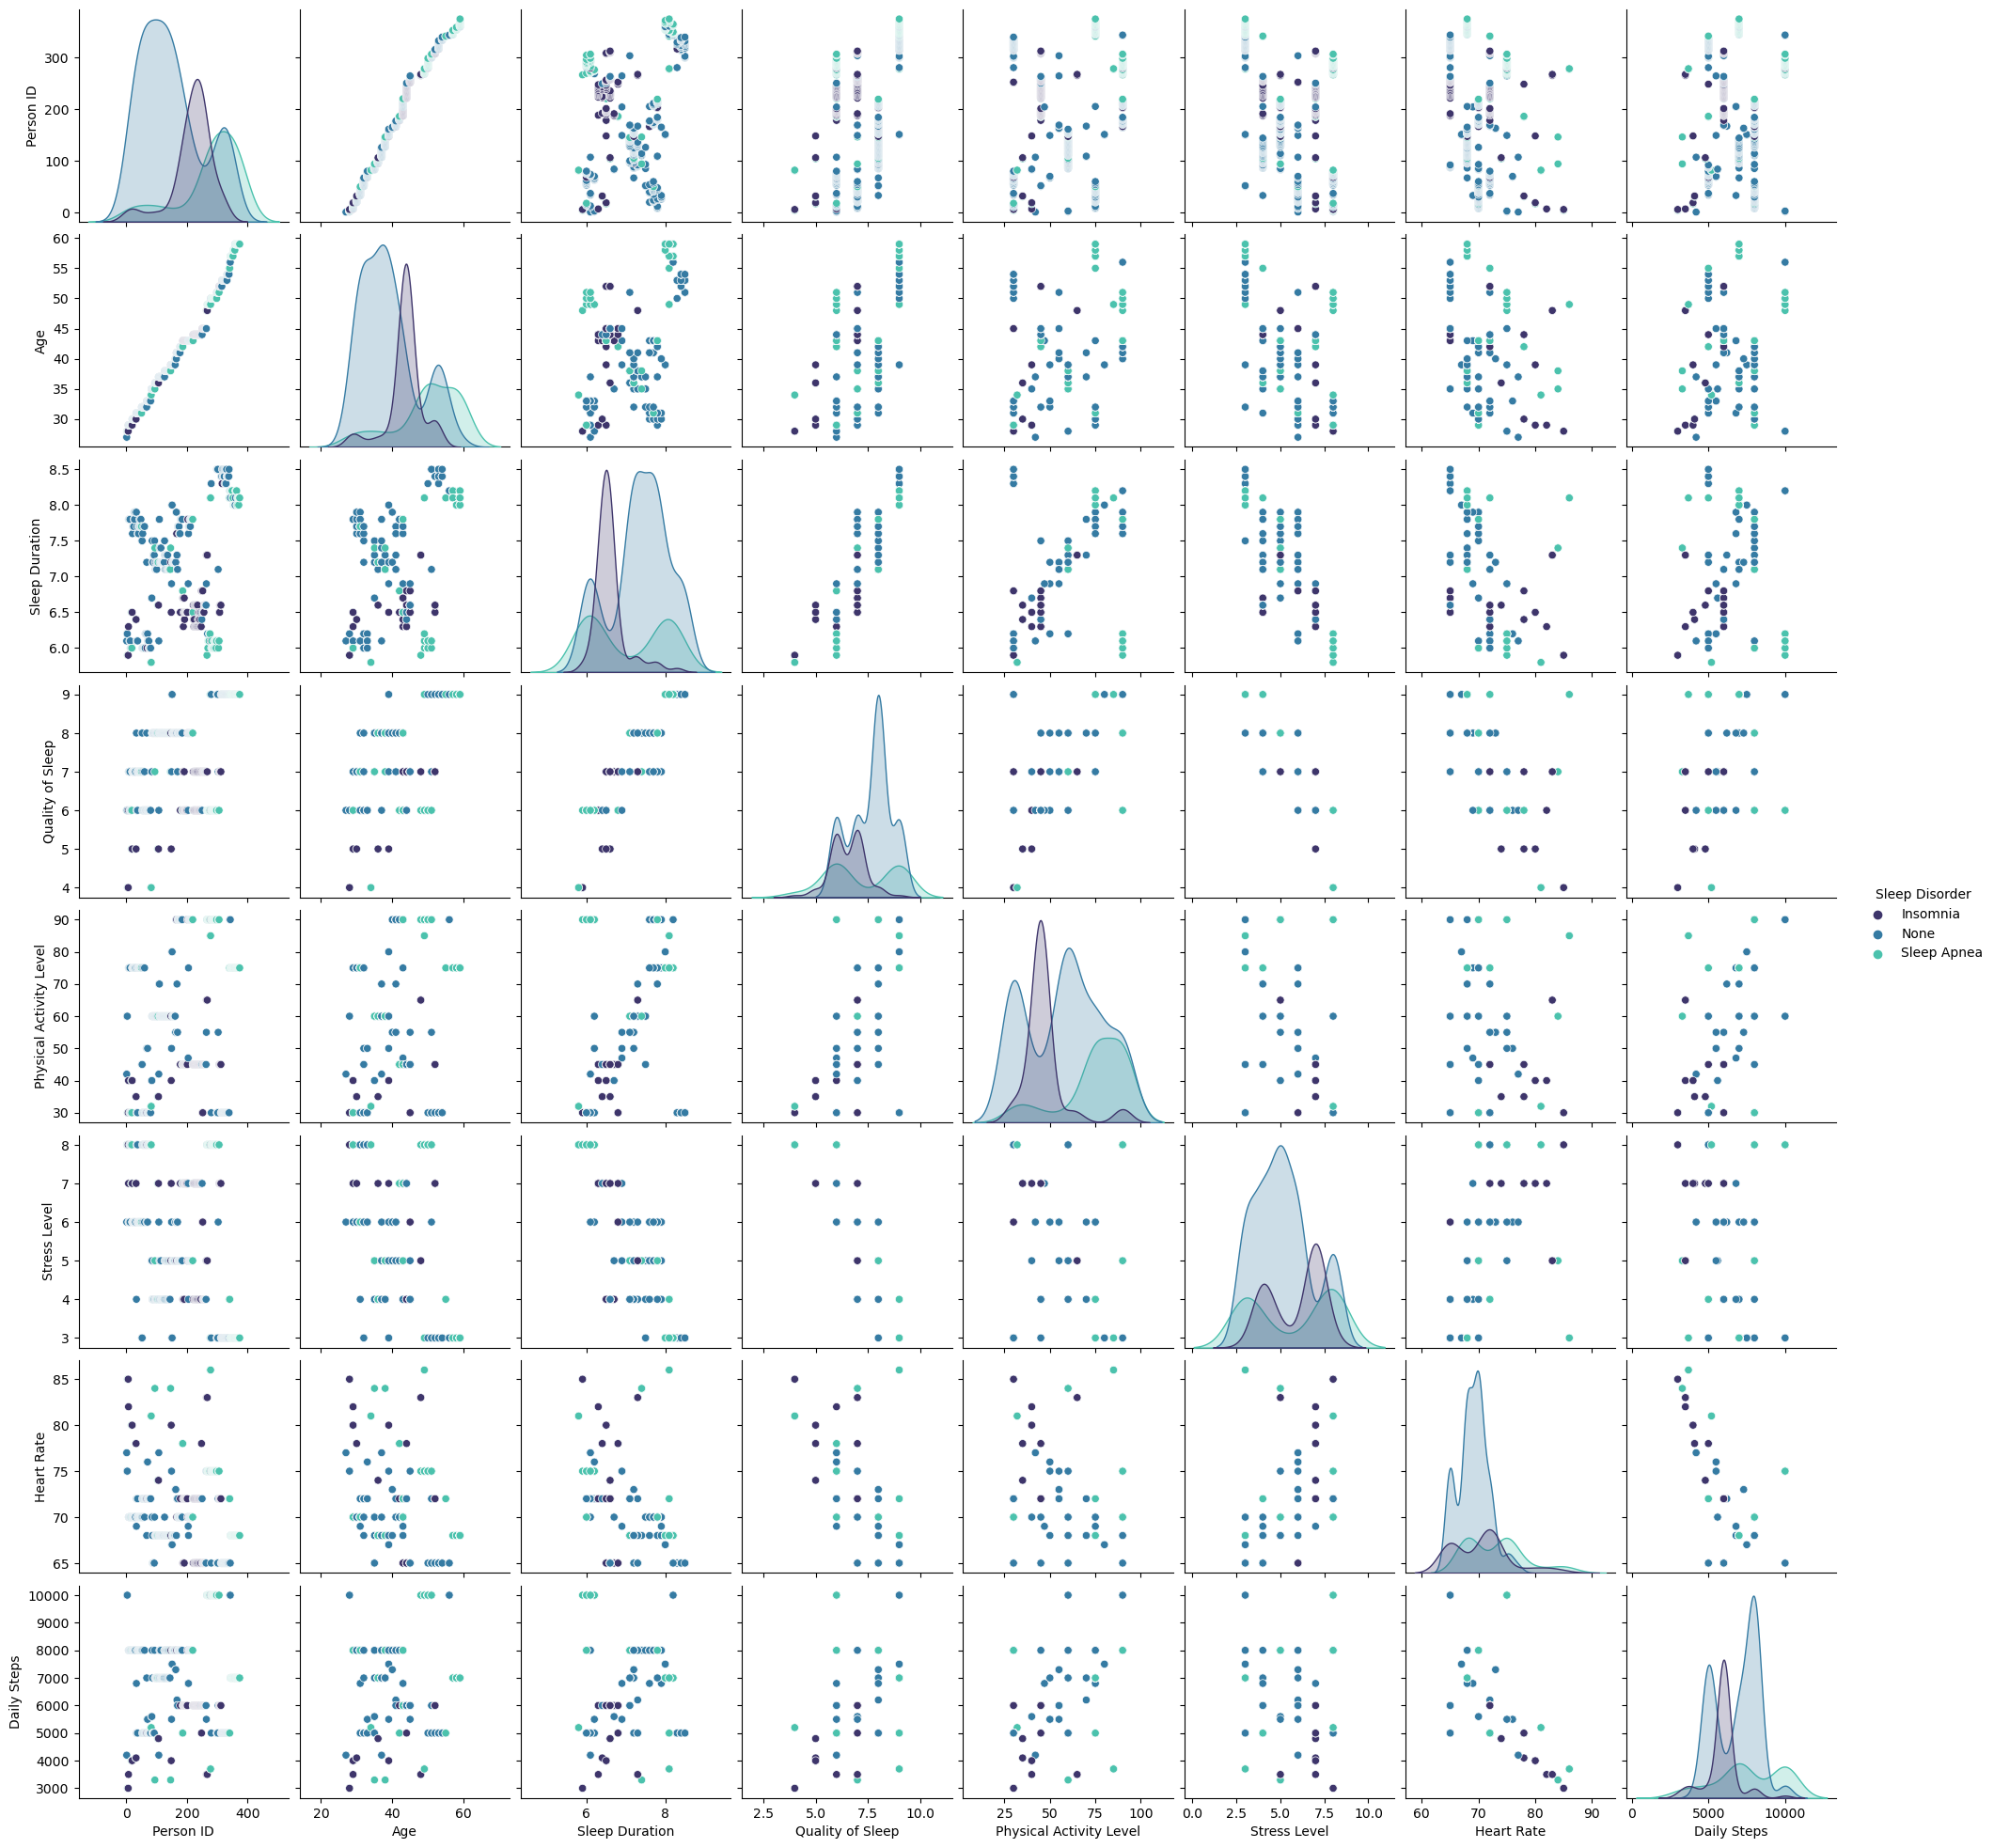

In [60]:
sns.pairplot(df,hue="Sleep Disorder",palette="mako");

- Pair plots visualizes the relationships between the variables of our dataset, colored by the 'Sleep Disorder' column.

## Outliers

> **Numerical Outliers**

In [61]:
from scipy import stats

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column in numeric_columns:  # Sadece sayısal sütunlar için
    outliers_iqr = detect_outliers_iqr(df, column)
    if not outliers_iqr.empty:
        outlier_percentage_iqr = len(outliers_iqr) / len(df) * 100
        print(f"There are outliers in the {column} column. Outlier percentage: {outlier_percentage_iqr:.2f}%")

There are outliers in the Heart Rate column. Outlier percentage: 4.01%


We use the Interquartile Range (IQR) method for outlier detection due to its robustness against extreme values and its simplicity in implementation. The IQR method focuses on the spread or variability of the middle 50% of the data, making it less sensitive to extreme outliers compared to other methods like the Z-score method.

Q1: 68.0
Q3: 72.0
IQR:  4.0
Lower Bound:  62.0
Upper Bound:  78.0


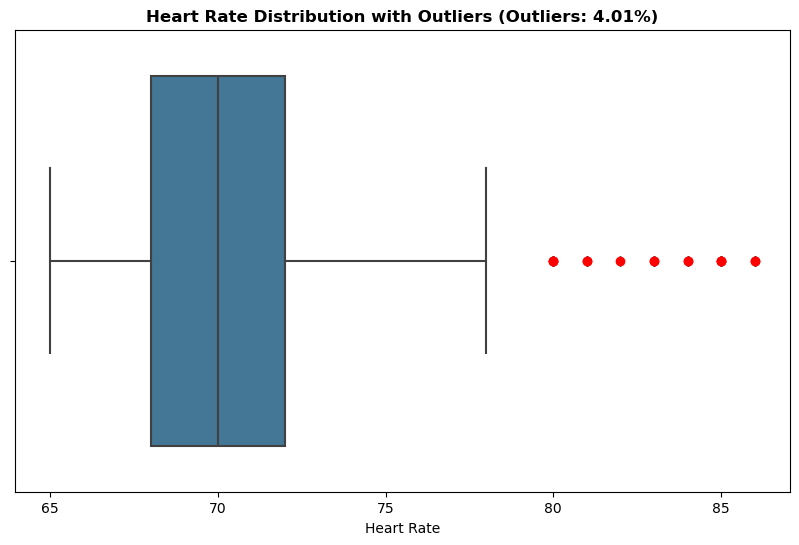

In [62]:
# Calculate the outliers
Q1 = df['Heart Rate'].quantile(0.25)
print("Q1:", Q1)
Q3 = df['Heart Rate'].quantile(0.75)
print("Q3:", Q3)
IQR = Q3 - Q1
print("IQR: ", IQR)

lower_bound = Q1 - 1.5 * IQR
print("Lower Bound: ",lower_bound)
upper_bound = Q3 + 1.5 * IQR
print("Upper Bound: ",upper_bound)

outliers = df[(df['Heart Rate'] < lower_bound) | (df['Heart Rate'] > upper_bound)]
outlier_percentage = len(outliers) / len(df) * 100


plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Heart Rate'], palette="mako")
plt.title(f'Heart Rate Distribution with Outliers (Outliers: {outlier_percentage:.2f}%)', 
          fontweight='bold')

# Highlight the outliers
for outlier in outliers['Heart Rate']:
    plt.plot(outlier, 0, 'ro')

plt.show()


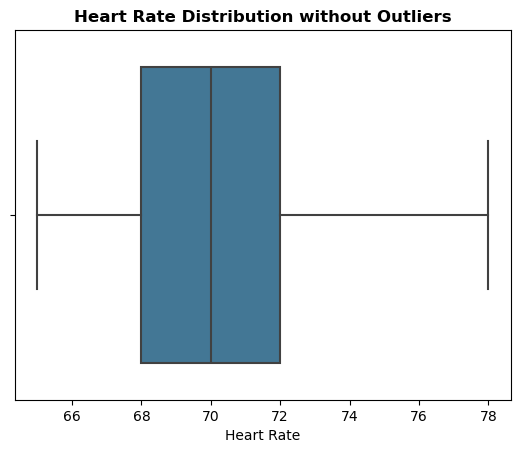

In [63]:
df['Heart Rate'] = np.where(df['Heart Rate'] < lower_bound, lower_bound, df['Heart Rate'])
df['Heart Rate'] = np.where(df['Heart Rate'] > upper_bound, upper_bound, df['Heart Rate'])

sns.boxplot(x=df['Heart Rate'], palette="mako")
plt.title(f'Heart Rate Distribution without Outliers', fontweight='bold');


We compressed the outliers in the 'Heart Rate' column to the lower and upper bounds. If the outliers were less than the lower bound, they were set to the lower bound value, and if they were greater than the upper bound, they were set to the upper bound value. This helps reduce the impact of outliers while preserving the original data distribution. Above box plot shows us the updated version.

> **Categorical Outliers**

In [64]:
def detect_rare_categories(df, column, threshold=0.05):
    category_counts = df[column].value_counts(normalize=True)
    rare_categories = category_counts[category_counts < threshold]
    return rare_categories

for column in df.columns:
    if df[column].dtype == 'category':  # For categorical columns
        rare_categories = detect_rare_categories(df, column)
        if not rare_categories.empty:
            print(f"Outliers categories in the {column} column:")
            print(rare_categories)
            print("___________________________________________")
        print("")



Outliers categories in the Occupation column:
Occupation
Scientist               0.010695
Software Engineer       0.010695
Sales Representative    0.005348
Manager                 0.002674
Name: proportion, dtype: float64
___________________________________________

Outliers categories in the BMI Category column:
BMI Category
Obese    0.026738
Name: proportion, dtype: float64
___________________________________________

Outliers categories in the Blood Pressure column:
Blood Pressure
140/90    0.010695
125/82    0.010695
132/87    0.008021
128/85    0.008021
139/91    0.005348
135/88    0.005348
131/86    0.005348
130/86    0.005348
128/84    0.005348
129/84    0.005348
115/78    0.005348
126/83    0.005348
119/77    0.005348
118/75    0.005348
117/76    0.005348
142/92    0.005348
122/80    0.002674
121/79    0.002674
118/76    0.002674
Name: proportion, dtype: float64
___________________________________________





## Label Process

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df:
    df[col] = le.fit_transform(df[col])
df

Person ID  Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0            0       1    0           9               3                 2   
1            1       1    1           1               4                 2   
2            2       1    1           1               4                 2   
3            3       1    1           6               1                 0   
4            4       1    1           6               1                 0   
..         ...     ...  ...         ...             ...               ...   
369        369       0   30           5              22                 5   
370        370       0   30           5              21                 5   
371        371       0   30           5              22                 5   
372        372       0   30           5              22                 5   
373        373       0   30           5              22                 5   

     Physical Activity Level  Stress Level  BMI Category  Blood Pressure  \
0                          4             3             2              11   
1                          9             5             0               9   
2                          9             5             0               9   
3                          0             5             1              22   
4                          0             5             1              22   
..                       ...           ...           ...             ...   
369                       12             0             2              23   
370                       12             0             2              23   
371                       12             0             2              23   
372                       12             0             2              23   
373                       12             0             2              23   

     Heart Rate  Daily Steps  Sleep Disorder  Age_grp  
0            10            6               1        0  
1             8           19               1        0  
2             8           19               1        0  
3            11            0               2        0  
4            11            0               2        0  
..          ...          ...             ...      ...  
369           2           15               2        3  
370           2           15               2        3  
371           2           15               2        3  
372           2           15               2        3  
373           2           15               2        3  

[374 rows x 14 columns]

 Each column's unique categories have been replaced with corresponding numerical labels, making the DataFrame suitable for various analytical and predictive tasks.

In [66]:
df_corr = df.corr()
df_corr["Sleep Duration"].sort_values(ascending = False)

Sleep Duration             1.000000
Quality of Sleep           0.879352
Age_grp                    0.372683
Age                        0.356898
Person ID                  0.311105
Physical Activity Level    0.192503
Sleep Disorder             0.171440
Daily Steps                0.072468
Gender                    -0.129468
Blood Pressure            -0.179067
BMI Category              -0.289097
Occupation                -0.312653
Heart Rate                -0.552676
Stress Level              -0.810712
Name: Sleep Duration, dtype: float64

Positive correlations indicate a direct relationship, while negative correlations indicate an inverse relationship.

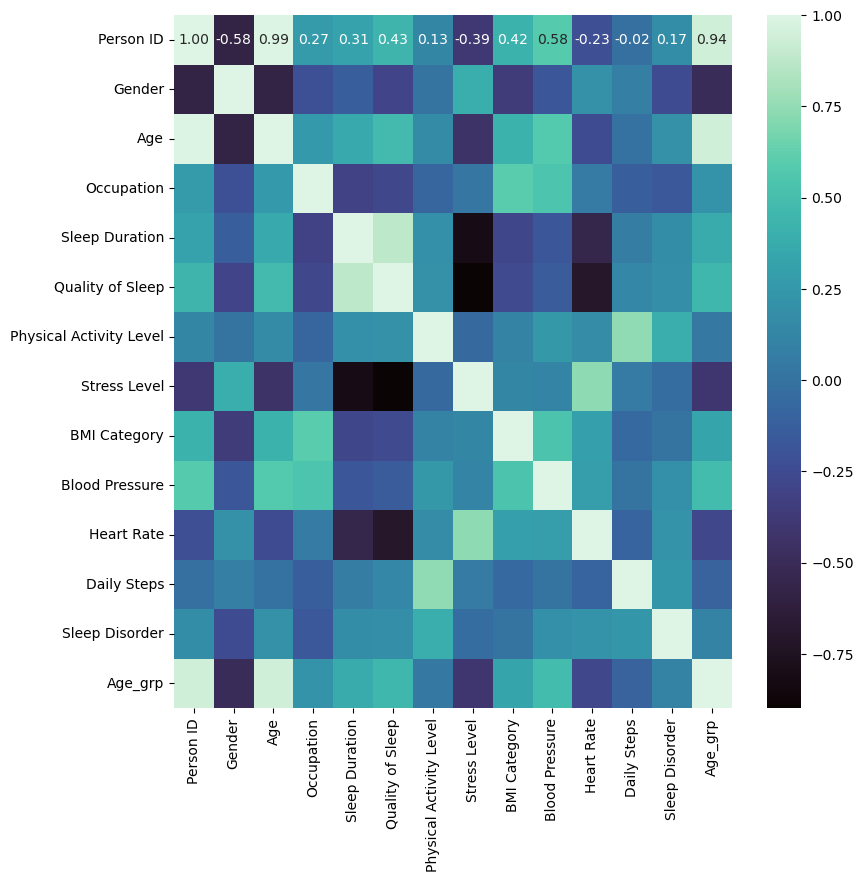

In [67]:
plt.figure(figsize = (9, 9))
sns.heatmap(df.corr(numeric_only=True),fmt = ".2f",annot=True,cmap="mako");
plt.show()

**Person ID and Age:**
There is a very high positive correlation (0.99), indicating that as the Person ID increases, the Age also increases. This might suggest that Person IDs were assigned in an order corresponding to the participants' ages.

**Sleep Duration and Quality of Sleep:**
There is a strong positive correlation (0.88), indicating that longer sleep duration is associated with higher quality of sleep.

**Sleep Duration and Stress Level:**
There is a strong negative correlation (-0.81), suggesting that longer sleep duration is associated with lower stress levels.

**Quality of Sleep and Stress Level:**
There is a very strong negative correlation (-0.9), suggesting that higher quality of sleep is associated with significantly lower stress levels.

**Quality of Sleep and Heart Rate:**
There is a strong negative correlation (-0.66), indicating that better quality of sleep is associated with lower heart rates.

**Physical Activity Level and Daily Steps:**
There is a high positive correlation (0.77), suggesting that higher physical activity levels are associated with a greater number of daily steps.

**Stress Level and Heart Rate:**
There is a strong positive correlation (0.67), indicating that higher stress levels are associated with higher heart rates.

**Age and Quality of Sleep:**
There is a moderate positive correlation (0.47), indicating that older individuals in this dataset might have slightly better quality of sleep.